In [1]:
#Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.filter(["Annual Income (k$)", "Spending Score (1-100)"], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


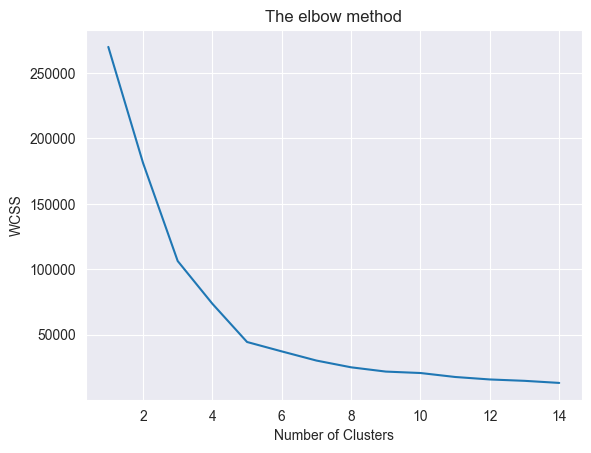

In [5]:
wcss = []

for i in range(1,15):
    Kmeans = KMeans(n_clusters=i, init='k-means++',max_iter=300, n_init=10, random_state=0)
    Kmeans.fit(df)
    wcss.append(Kmeans.inertia_)

#Melakukan plot untuk hasil sehingga bisa melakukan observasi terhadap elbow
plt.plot(range(1,15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS') 
plt.show()

<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

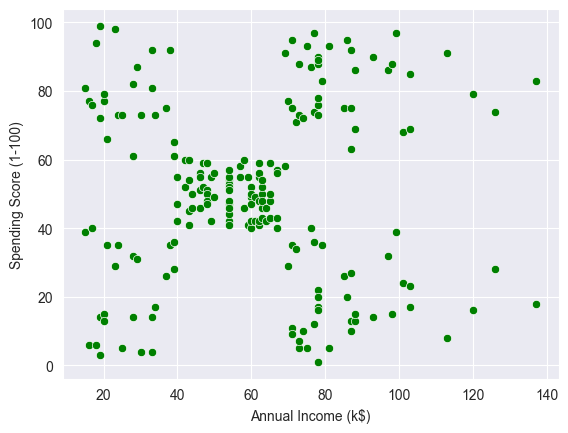

In [6]:
sns.scatterplot(data=df, x= "Annual Income (k$)", y="Spending Score (1-100)", c = ["green"])

In [7]:
model = KMeans(n_clusters=5)
model.fit(df)

KMeans(n_clusters=5)

In [8]:
print(model.cluster_centers_)

[[25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]]


<AxesSubplot: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

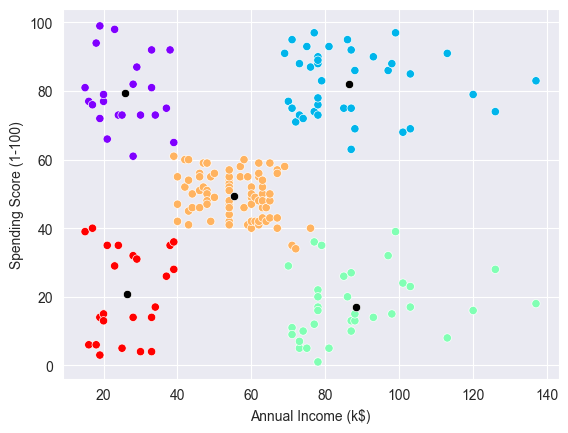

In [9]:
sns.scatterplot(data=df, x= "Annual Income (k$)", y="Spending Score (1-100)", c = model.labels_, cmap='rainbow')
sns.scatterplot(x= model.cluster_centers_[:,0], y= model.cluster_centers_[:,1], c = ['black'])